In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [4]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

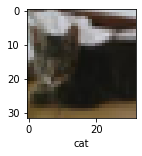

In [9]:
plot_sample(X_train,y_train,9)

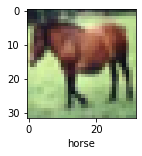

In [10]:
plot_sample(X_train,y_train,7)

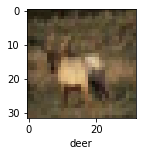

In [11]:
plot_sample(X_train,y_train,3)

In [12]:
X_train=X_train/255
X_test=X_test/255

In [15]:
ann = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 5s 2ms/step - loss: 1.8129 - accuracy: 0.3549
Epoch 2/5
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6249 - accuracy: 0.4264
Epoch 3/5
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5412 - accuracy: 0.4575
Epoch 4/5
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4843 - accuracy: 0.4765
Epoch 5/5
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4310 - accuracy: 0.4957


In [16]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 0s 1ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.52      0.53      1000
           1       0.78      0.34      0.48      1000
           2       0.33      0.45      0.38      1000
           3       0.27      0.56      0.36      1000
           4       0.52      0.30      0.38      1000
           5       0.47      0.24      0.32      1000
           6       0.46      0.60      0.53      1000
           7       0.55      0.53      0.54      1000
           8       0.63      0.57      0.60      1000
           9       0.57      0.51      0.54      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.47     10000
weighted avg       0.51      0.46      0.47     10000



In [17]:
cnn = keras.Sequential([
    #cnn
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters=64,activation='relu',kernel_size=(3,3)),
    keras.layers.MaxPooling2D((2,2)),
    #dense
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')    
    ])


In [18]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 1.5129 - accuracy: 0.4538
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1570 - accuracy: 0.5949
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.0230 - accuracy: 0.6444
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.9452 - accuracy: 0.6716
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.8851 - accuracy: 0.6930
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.8391 - accuracy: 0.7108
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.7992 - accuracy: 0.7198
Epoch 8/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.7611 - accuracy: 0.7363
Epoch 9/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.7258 - accuracy: 0.7472
Epoch 10/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.696

In [20]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9576 - accuracy: 0.6838


[0.9575625061988831, 0.6837999820709229]

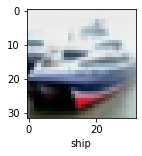

In [21]:
plot_sample(X_test,y_test,1)

In [23]:
y_pred=cnn.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [25]:
classes[np.argmax(y_pred[1])]

'ship'

In [26]:
y_classes=[np.argmax(element)for element in y_pred]

In [32]:
y_classes[:5]

[3, 8, 1, 0, 4]

In [31]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [33]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.73      0.72      1000
           1       0.78      0.86      0.82      1000
           2       0.85      0.31      0.45      1000
           3       0.44      0.66      0.52      1000
           4       0.65      0.61      0.63      1000
           5       0.69      0.48      0.57      1000
           6       0.78      0.77      0.78      1000
           7       0.62      0.83      0.71      1000
           8       0.80      0.80      0.80      1000
           9       0.78      0.79      0.78      1000

    accuracy                           0.68     10000
   macro avg       0.71      0.68      0.68     10000
weighted avg       0.71      0.68      0.68     10000

